In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [24]:
A = [[1,2,4,2],[2,3,6,3],[3,4,7,4],[4,5,8,9],[5,7,9,10],[7,5,4,88],[-4,-2,5,4],[1,2,8,77]]

In [25]:
type(A)

list

In [26]:
A = np.array(A)
type(A)

numpy.ndarray

In [27]:
A.shape

(8, 4)

In [28]:
A

array([[ 1,  2,  4,  2],
       [ 2,  3,  6,  3],
       [ 3,  4,  7,  4],
       [ 4,  5,  8,  9],
       [ 5,  7,  9, 10],
       [ 7,  5,  4, 88],
       [-4, -2,  5,  4],
       [ 1,  2,  8, 77]])

In [29]:
train = A[0:5,:-1]
test = A[0:5,-1]

In [30]:
print(train)
print(train.shape)

[[1 2 4]
 [2 3 6]
 [3 4 7]
 [4 5 8]
 [5 7 9]]
(5, 3)


In [31]:
print(test.shape)
test_1 = np.reshape(test,(-1,1))
print(test_1.shape)
print(test_1)

(5,)
(5, 1)
[[ 2]
 [ 3]
 [ 4]
 [ 9]
 [10]]


In [32]:
test_ip = A[5:,:-1]
test_op = A[5:,-1]

print(test_ip)
print(test_op)

[[ 7  5  4]
 [-4 -2  5]
 [ 1  2  8]]
[88  4 77]


In [10]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [11]:
my_reg = LinearRegression(fit_intercept=True, normalize=False)

my_reg.fit(train, test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
print('Slope:' ,my_reg.coef_)
print('Intercept:', my_reg.intercept_)

Slope: [ 7.         -1.33333333 -2.66666667]
Intercept: 8.333333333333316


In [33]:
pred_y_linear_regression = my_reg.predict(test_ip)

In [34]:
pred_y_linear_regression

array([ 40.        , -30.33333333,  -8.66666667])

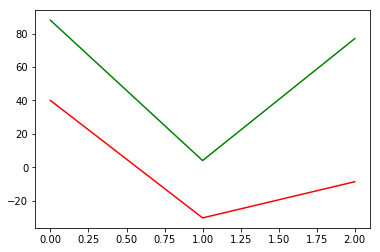

In [35]:
plt.plot(test_op, color = 'green')
plt.plot(pred_y_linear_regression, color = 'red')
plt.show()

In [50]:
my_SGD = linear_model.SGDRegressor(max_iter=1000, tol=1e-3, loss='huber')
my_SGD.fit(train, test)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='huber', max_iter=1000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=0.001, verbose=0,
       warm_start=False)

In [47]:
pred_y_SGD = my_SGD.predict(test_ip)

test_op [88  4 77]
pred_y_SGD [3.85277041 0.76241285 3.62867603]


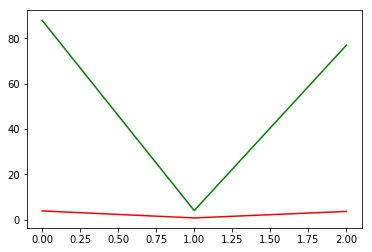

In [48]:
print('test_op', test_op)
print('pred_y_SGD',pred_y_SGD)
plt.plot(test_op, color = 'green')
plt.plot(pred_y_SGD, color ='red')
plt.show()

In [25]:
# my way

In [26]:
x_1 = train[:,0]
x_2 = train[:,1]
x_3 = train[:,2]

In [27]:
print(x_1,'\n',x_2,'\n',x_3)

[1 2 3 4 5] 
 [2 3 4 5 7] 
 [4 6 7 8 9]


In [30]:
x_1_mean = np.mean(x_1)
x_2_mean = np.mean(x_2)
x_3_mean = np.mean(x_3)
print(x_1_mean)
print(x_2_mean)
print(x_3_mean)

3.0
4.2
6.8


In [33]:
x_1_minus_x_1_mean = x_1 - x_1_mean
x_2_minus_x_2_mean = x_2 - x_2_mean
x_3_minus_x_3_mean = x_3 - x_3_mean

In [34]:
print(x_1_minus_x_1_mean)
print(x_2_minus_x_2_mean)
print(x_3_minus_x_3_mean)

[-2. -1.  0.  1.  2.]
[-2.2 -1.2 -0.2  0.8  2.8]
[-2.8 -0.8  0.2  1.2  2.2]


In [37]:
y = test
y_mean = np.mean(y)
print(y_mean)
y_minus_y_mean = y - y_mean
print(y_minus_y_mean)

5.6
[-3.6 -2.6 -1.6  3.4  4.4]


In [38]:
first_mul = x_1_minus_x_1_mean*y_minus_y_mean
second_mul = x_2_minus_x_2_mean*y_minus_y_mean
third_mul = x_3_minus_x_3_mean*y_minus_y_mean

print(first_mul,'\n',second_mul,'\n',third_mul)


[ 7.2  2.6 -0.   3.4  8.8] 
 [ 7.92  3.12  0.32  2.72 12.32] 
 [10.08  2.08 -0.32  4.08  9.68]


In [41]:
m=0
for i in first_mul:
    i= i+m
    m=i
print(i)

n=0
for j in second_mul:
    j= j+n
    n=j
print(j)

p=0
for k in third_mul:
    k= k+p
    p=k
print(k)

22.0
26.4
25.6


In [43]:
m_1 =0
for i_1 in x_1_minus_x_1_mean:
    i_1 = i_1**2 + m_1
    m_1 = i_1
print(i_1)

n_1 =0
for j_1 in x_2_minus_x_2_mean:
    j_1 = j_1**2 + n_1
    n_1 = j_1
print(j_1)

p_1 =0
for k_1 in x_3_minus_x_3_mean:
    k_1 = k_1**2 + p_1
    p_1 = k_1
print(k_1)

10.0
14.8
14.8


In [47]:
slope_1 = i/i_1
slope_2 = j/j_1
slope_3 = k/k_1

In [48]:
print(slope_1)
print(slope_2)
print(slope_3)

2.2
1.7837837837837835
1.7297297297297298
